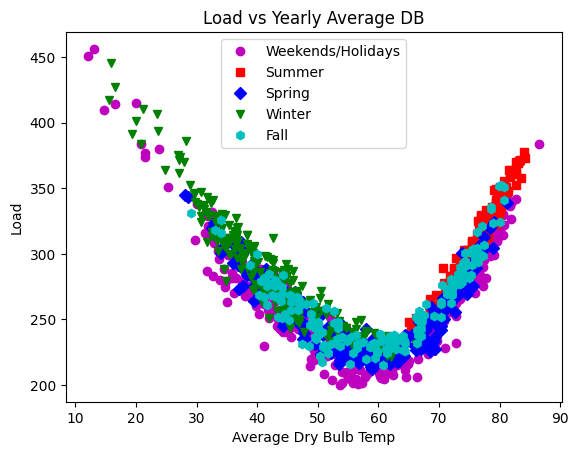

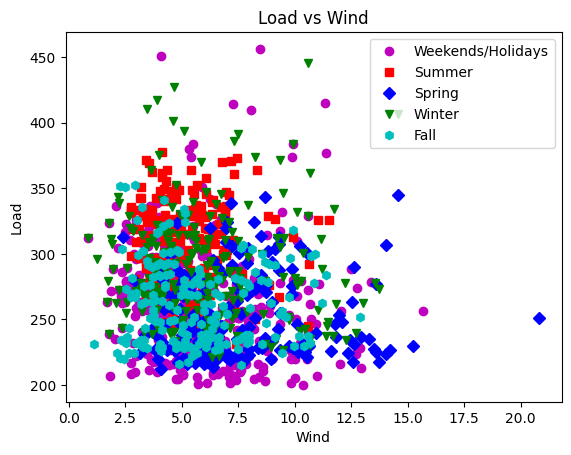

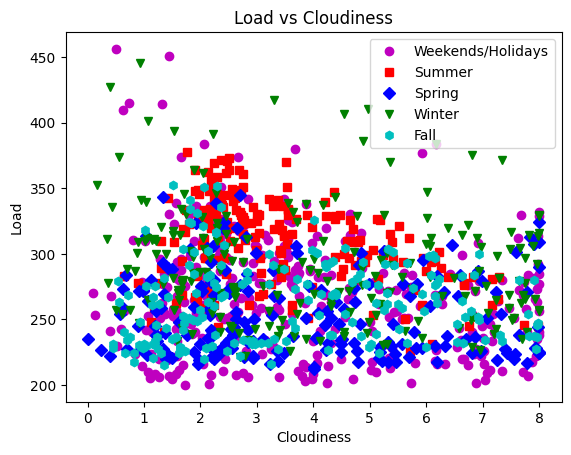

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 3

Boosting_data = pd.read_csv("Data/BoostingData.csv")
X = Boosting_data.values[:,3:]
y = Boosting_data.values[:,2]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

Bdata=Boosting_data.values[:,2:]
springCount=0
fallCount=0
winterCount=0
summerCount=0
monthCol= int(1)
weekEndCol= int(2)
bankHol= int(3)
retHol= int(4)
for i in range(len(Bdata)):
    if Bdata[i, monthCol]>=6 and Bdata[i,monthCol]<= 8 and Bdata[i, weekEndCol] < 6 and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        summerCount= summerCount+1
    if Bdata[i,monthCol]>=9 and Bdata[i,monthCol]<= 11 and Bdata[i, weekEndCol] < 6 and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        fallCount= fallCount+1
    if Bdata[i, monthCol]==12 or Bdata[i,monthCol]<= 2 and Bdata[i, weekEndCol] < 6 and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        winterCount= winterCount+1
    if Bdata[i, monthCol]>=3 and Bdata[i,monthCol]<= 5 and Bdata[i, weekEndCol] < 6 and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        springCount= springCount+1

n,m= np.shape(Bdata)
bDataW=np.zeros((winterCount, m))
bDataS=np.zeros((summerCount, m))
bDataSp=np.zeros((springCount, m))
bDataF=np.zeros((fallCount, m))


springCount=0
fallCount=0
winterCount=0
summerCount=0
for i in range(len(Bdata)):
    if Bdata[i, monthCol]>=6 and Bdata[i,monthCol]<= 8 and Bdata[i, weekEndCol ] < 6  and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        bDataS[summerCount]= Bdata[i]
        summerCount= summerCount+1
    if Bdata[i,monthCol]>=9 and Bdata[i,monthCol]<= 11 and Bdata[i, weekEndCol] < 6  and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        bDataF[fallCount]= Bdata[i]
        fallCount= fallCount+1
    if Bdata[i, monthCol]==12 or Bdata[i,monthCol]<= 2 and Bdata[i, weekEndCol] < 6  and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        bDataW[winterCount]= Bdata[i]
        winterCount= winterCount+1
    if Bdata[i, monthCol]>=3 and Bdata[i,monthCol]<= 5 and Bdata[i, weekEndCol] < 6  and Bdata[i, bankHol]==0 and Bdata[i, retHol]==0:
        bDataSp[springCount]= Bdata[i]
        springCount= springCount+1

#print(bDataSp)

countWeekend=0
for i in range(len(Bdata)):
    if (Bdata[i, weekEndCol] >=6 and Bdata[i, weekEndCol] <= 7 ) or  Bdata[i, bankHol]==1 or Bdata[i, retHol]==1:
        countWeekend= countWeekend+1
        

weekendData= np.zeros((countWeekend, m))
countWeekend=0
for i in range(len(Bdata)):
    if (Bdata[i, weekEndCol] >=6 and Bdata[i, weekEndCol] <= 7 ) or  Bdata[i, bankHol]==1 or Bdata[i, retHol]==1:
        weekendData[countWeekend]= Bdata[i]
        countWeekend= countWeekend+1



plt.figure()
plt.plot(weekendData[:,6],weekendData[:,0], marker= "o",linewidth=0, color= "m", label= "Weekends/Holidays")
plt.plot(bDataS[:,6],bDataS[:,0], marker= "s",linewidth=0, color= "r", label= "Summer")
plt.plot(bDataSp[:,6],bDataSp[:,0], marker= "D",linewidth=0, color= "b", label= "Spring")
plt.plot(bDataW[:,6],bDataW[:,0], marker= "v",linewidth=0, color= "g", label= "Winter")
plt.plot(bDataF[:,6],bDataF[:,0], marker= "h",linewidth=0, color= "c", label= "Fall")
plt.legend()
plt.xlabel("Average Dry Bulb Temp")
plt.ylabel("Load")
plt.title("Load vs Yearly Average DB")
plt.savefig("Plots/load_vs_temp")
plt.show()


plt.figure()
plt.plot(weekendData[:,10],weekendData[:,0], marker= "o",linewidth=0, color= "m", label= "Weekends/Holidays")
plt.plot(bDataS[:,10],bDataS[:,0], marker= "s",linewidth=0, color= "r", label= "Summer")
plt.plot(bDataSp[:,10],bDataSp[:,0], marker= "D",linewidth=0, color= "b", label= "Spring")
plt.plot(bDataW[:,10],bDataW[:,0], marker= "v",linewidth=0, color= "g", label= "Winter")
plt.plot(bDataF[:,10],bDataF[:,0], marker= "h",linewidth=0, color= "c", label= "Fall")
plt.legend()
plt.xlabel("Wind")
plt.ylabel("Load")
plt.title("Load vs Wind")
plt.savefig("Plots/load_vs_wind")
plt.show()


plt.figure()
plt.plot(weekendData[:,9],weekendData[:,0], marker= "o",linewidth=0, color= "m", label= "Weekends/Holidays")
plt.plot(bDataS[:,9],bDataS[:,0], marker= "s",linewidth=0, color= "r", label= "Summer")
plt.plot(bDataSp[:,9],bDataSp[:,0], marker= "D",linewidth=0, color= "b", label= "Spring")
plt.plot(bDataW[:,9],bDataW[:,0], marker= "v",linewidth=0, color= "g", label= "Winter")
plt.plot(bDataF[:,9],bDataF[:,0], marker= "h",linewidth=0, color= "c", label= "Fall")
plt.legend()
plt.xlabel("Cloudiness")
plt.ylabel("Load")
plt.title("Load vs Cloudiness")
plt.savefig("Plots/load_vs_clouds")
plt.show()